<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/Pyhton%20documentos/Caso_3_Regresi%C3%B3n_Lineal_M%C3%BAltiple_Datos_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: "RUBEN PIZARRO GURROLA"
# Date: "16-03-2022"


# Objetivo

Construir y evaluar un modelo de regresión lineal múltiple para realizar predicciones.

# Descripción

* Se cargan las librerías necesarias

* Se cargan los datos Se exploran los datos

* Se crear los datos de entrenamiento y validación 70% y 30% respectivamente
* Se construye el modelo con datos de entrenamiento
* Se evalúa el modelo
* Se hacen predicciones
* Se visualiza las prediciones vs los valores reales
* Se describe e intrepreta el modelo

## Las métricas a valorar serán:

* Que los coeficientes sean estadísticamente significativos por encima del 95%.

* R Squared y R Square Ajustado el modelo se acepta si sobrepasa en el 80%.

* *rmse* comparado con otro modelo mismos datos se acepta o se establece que un modelo es mejor que otro.

# Fundamento teórico

En la mayoría de los problemas de investigación en los que se aplica el análisis de regresión se necesita más de una variable independiente para el modelo de regresión. La complejidad de la mayoría de mecanismos científicos es tal que, con el fin de predecir una respuesta importante, se requiere un modelo de regresión múltiple. Cuando un modelo es lineal en los coeficientes se denomina modelo de regresión lineal múltiple.

Para el caso de k variables independientes, el modelo que da x1,x2,...,xk, y y como la variable dependiente.x1,x,...,xk son las variable s que afectan a la variable dependiente en el modelo de regresión lineal múltiple. (Walpole, Myers, and Myers 2012a)

Muchos problemas de investigación y de la industria, requieren la estimación de las relaciones existentes entre el patrón de variabilidad de una variable aleatoria y los valores de una o más variables aleatorias. (Urrutia Mosquera 2011)

Al generar un modelo de regresión lineal múltiple es importante identificar los estadísticos de R2, que se denomina coeficiente de determinación y es una medida de la proporción de la variabilidad explicada por el modelo ajustado.

De igual forma, el valor de R2 ajustado o coeficiente de determinación ajustado, es una variación de R2 que proporciona un ajuste para los grados de libertad (Walpole, Myers, and Myers 2012b). R Ajustado está diseñado para proporcionar un estadístico que castigue un modelo sobreajustado, de manera que se puede esperar que favorezca al modelo.(Walpole, Myers, and Myers 2012).

Una variable **Y** puede predecirse conforme y de cuerdo con la siguiente fórmula de la regresión múltiple.

$$
Y = b_0 + b_1{x_1} + b_2{x_2} + b_3{x_3}+ .....b_k{x_k}
$$




# Desarrollo



## Cargar librerías



In [329]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadístias R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cargar datos



In [12]:
datos = datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising.csv")
datos

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Explorar datos


In [10]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes


Observaciones y variables:  (200, 5)
Columnas y tipo de dato


Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

Se describen las variables independientes: TV, Radio Newpaper y la variable dependiente Sales.

Valor de etiqueta o variable objetivo deendiente(ventas):
que significa el volumen de ventas del producto correspondiente

Las variables independientes: (TV, Radio, Periódico):

TV: para un solo producto en un mercado determinado, el costo de la publicidad en TV (en miles)
Radio: costos de publicidad invertidos en medios de difusión
Periódico: costos publicitarios para medios periodísticos

In [17]:
datos[['TV','Radio', 'Newspaper', 'Sales']].describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Dispersión de la variables con respecto a Sales o venras


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


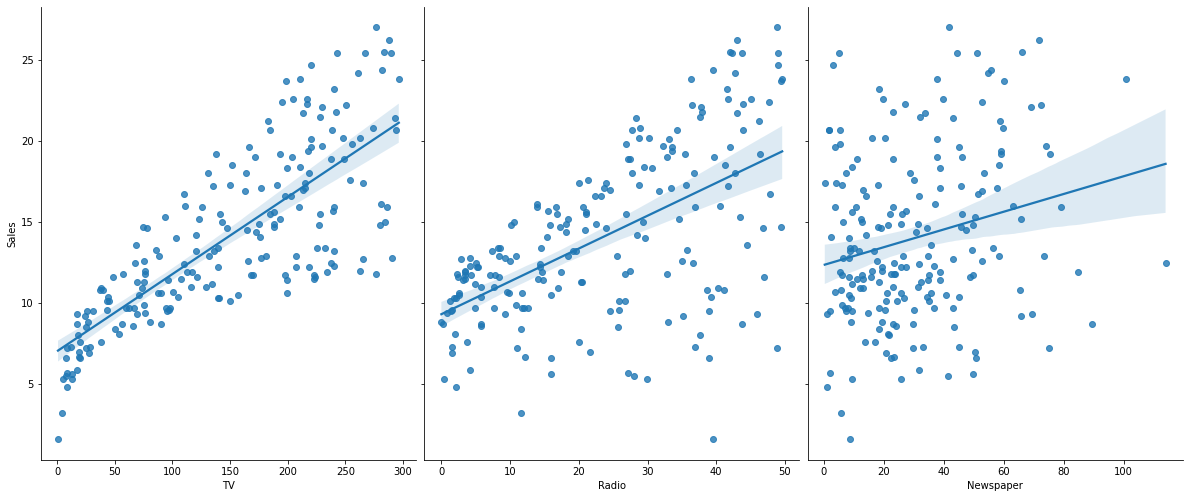

In [20]:

sns.pairplot(datos, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

Se observa la relación lineal entre las variables independientes con respecto a ventas, de tal forma que es posible estimar visualmente que la variable Newspaper tal vez tenga poco impacto en las ventas esto por la alta dispersión de los datos. Sin embargo participará en el modelo de regresión lineal múltiple.


## Datos de entrenamiento y datos de validación 


Se identifican las variables que participan en el la partición de los datos de entrenamiento y validación.

Se parten los datos 70% datos de entrenamiento y 30% datos de validación


In [85]:
datos.iloc[:, 4:5]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [242]:
print("Variables independientes ")
X_independientes = datos.iloc[:,1:4]
X_independientes




Variables independientes 


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [241]:
print ("Variable dependiente")
Y_dependiente = datos.iloc[:, 4:5]
Y_dependiente

Variable dependiente


,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [178]:

X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=2022)
 



### Datos de entrenamiento

Variables independientes


In [285]:
print("Estructura de datos de entrenamiento... ", X_entrena.shape)
print(X_entrena)
print(X_entrena[['TV']], X_entrena[['Radio']], X_entrena[['Newspaper']])


Estructura de datos de entrenamiento...  (140, 3)
        TV  Radio  Newspaper
51   100.4    9.6        3.6
101  296.4   36.3      100.9
85   193.2   18.4       65.7
193  166.8   42.0        3.6
5      8.7   48.9       75.0
..     ...    ...        ...
183  287.6   43.0       71.8
177  170.2    7.8       35.2
112  175.7   15.4        2.4
173  168.4    7.1       12.8
125   87.2   11.8       25.9

[140 rows x 3 columns]
        TV
51   100.4
101  296.4
85   193.2
193  166.8
5      8.7
..     ...
183  287.6
177  170.2
112  175.7
173  168.4
125   87.2

[140 rows x 1 columns]      Radio
51     9.6
101   36.3
85    18.4
193   42.0
5     48.9
..     ...
183   43.0
177    7.8
112   15.4
173    7.1
125   11.8

[140 rows x 1 columns]      Newspaper
51         3.6
101      100.9
85        65.7
193        3.6
5         75.0
..         ...
183       71.8
177       35.2
112        2.4
173       12.8
125       25.9

[140 rows x 1 columns]


## Creando el modelo
Crear a partir de los datos de entrenamiento el modelo de regresión lineal múltiple.

Se muestran los coeficientes: 



In [286]:
modelo_rm = LinearRegression()
 
modelo_rm.fit(X_entrena,Y_entrena)
 
print ("Intercepción o b0") 
b0 = modelo_rm.intercept_
print (b0)

print ("Coeficientes: b1, b2 y b3") 
# print (modelo_rm.coef_)
b1 = modelo_rm.coef_[0, 0:1]
b2 = modelo_rm.coef_[0, 1:2]
b3 = modelo_rm.coef_[0, 2:3]
print (b1, b2, b3)


Intercepción o b0
[2.9176993]
Coeficientes: b1, b2 y b3
[0.04560508] [0.18901996] [-0.00196361]


$$PrediccionY = b_0 + b_1{x_1} + b_2{x_2} + b_3{x_3}$$


## R Square y R Square ajustado a a partir del modelo

Sobrepasa el 80% de tal forma que el el modelo **SE ACEPA** por este criterio

In [337]:
print(modelo_rm.score(X_entrena, Y_entrena))

0.8789152518594444


## Predicciones

Se generan las predicciones a partir de los datos de validación, por lo que resulta las estimaciones con la función *predict()* del modelo de regresión múltiple.

In [305]:
predicciones = modelo_rm.predict(X_valida)
print(predicciones[:-1])
print(predicciones.shape)

[[21.83261188]
 [ 6.4277089 ]
 [18.45948501]
 [15.47588869]
 [24.02449808]
 [18.29426092]
 [13.84931373]
 [ 9.94735024]
 [ 7.57747879]
 [13.98767217]
 [ 7.57513461]
 [17.56332247]
 [14.27717687]
 [15.04742636]
 [18.00884466]
 [12.33391457]
 [23.35895084]
 [18.15991368]
 [21.04944641]
 [19.34370985]
 [ 3.70488128]
 [ 6.98099145]
 [ 7.05154864]
 [16.30582273]
 [ 7.3544544 ]
 [19.0622407 ]
 [14.70288818]
 [23.12658945]
 [21.66635916]
 [20.71587189]
 [10.1250497 ]
 [ 8.79720573]
 [11.91864325]
 [13.88931833]
 [21.53986369]
 [ 9.65755715]
 [12.72569829]
 [18.92079402]
 [ 8.39051662]
 [11.76788471]
 [17.27399069]
 [ 8.43800138]
 [17.08880043]
 [ 6.52408183]
 [20.74525868]
 [14.65434577]
 [11.27966473]
 [12.73511659]
 [13.49616337]
 [ 7.82056806]
 [11.40497183]
 [ 6.49979936]
 [13.67721317]
 [ 6.07872675]
 [10.33736038]
 [ 9.8611886 ]
 [ 9.83494926]
 [17.86131305]
 [20.42050073]]
(60, 1)


## Determinando métricas

Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas.

Se usa el *type()* para conocer el tipo de estructura de datos

Se usa el *assign()* para agregar columnas al df comparaciones

Se usa *flatten().tolist()* para convertir a una lsita de una dimensión.

Al final se tiene un *data.frame * llamado comparaciones que las últimas columnas tienen los valores reales de 'Sales' y las predicciiones en la variable 'Predicho'.


In [324]:
print(type(X_valida))
# print(X_valida)

print(type(predicciones))
# print(predicciones)


comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Sales_Real = Y_valida)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
print(comparaciones)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
        TV  Radio  Newspaper  Sales_Real   Predicho
58   210.8   49.6       37.7        23.8  21.832612
22    13.2   15.9       49.6         5.6   6.427709
184  253.8   21.3       30.0        17.6  18.459485
131  265.2    2.9       43.0        12.7  15.475889
98   289.7   42.3       51.2        25.4  24.024498
141  193.7   35.4       75.6        19.2  18.294261
181  218.5    5.4       27.4        12.2  13.849314
157  149.8    1.3       24.3        10.1   9.947350
172   19.6   20.1       17.0         7.6   7.577479
135   48.3   47.0        8.5        11.6  13.987672
32    97.2    1.5       30.0         9.6   7.575135
102  280.2   10.1       21.4        14.8  17.563322
171  164.5   20.9       47.4        14.5  14.277177
123  123.1   34.6       12.4        15.2  15.047426
20   218.4   27.7       53.4        18.0  18.008845
159  131.7   18.4       34.6        12.9  12.333915
36   266.9   43.8        5.0        25.4  23.358951
15

#### R Square

Se obtienen el R Square con las predicciones

In [327]:
print('R Square :', r2_score(comparaciones['Sales_Real'], comparaciones['Predicho'] ))


R Square : 0.9332340109009485


El valor de *R Square* ESTÁ POR ENCIMA del 80%, por lo cual, por este criterio el modelo **SI SE ACEPTA.**

#### rmse

$$
rmse = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$




In [338]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_valida, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))


Mean Squared Error: MSE 2.007882522104384
Root Mean Squared Error RMSE: 1.4169977142198869


Habrá que comparar e valor de RMSE con otro modelo y será más eficiente aquel que se acerque a cero


### Valores Reales Sales Vs Prediciones

Se visualiza y se compara los valores reales contra las predicciones

Se extraen los valores reales, en 'rojo' los valores rales de las ventas *Sales*

En azul las predicciones



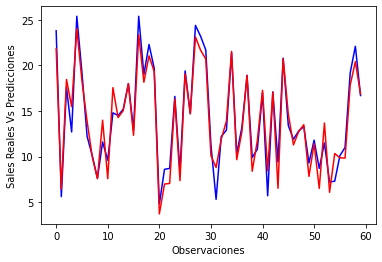

In [345]:
y1 = Y_valida.values
y2 = predicciones.flatten().tolist()
# Plot list 'y'
plt.plot(y1, 'b')
plt.plot(y2, 'r')


# Plot axes labels and show the plot
plt.xlabel('Observaciones')
plt.ylabel('Sales Reales Vs Predicciones')
plt.show()

# Interpretación 